# Multiple Linear Regression


In the one-dimensional case we had:

$$\{ (x_1, y_1), (x_1, y_1), (x_1, y_1), \cdots, (x_n, y_n) \}$$

Now, we still have this, but $x_i$ is a vector, not a scalar.

$$\hat{y} = w^T x + b $$

we will call the size Dimensionality, and we will represent it by the letter $D$. note that $w$ is also of dimension $D$. We can always absorb $b$ into $w$ by appending a 1 to the feature vector $x$.

- This is equivalent to adding a column of 1s to our data matrix $X$

$$\hat{y} = b + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D$$
$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D$$
$$\hat{y} = w_0 x_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D$$

Where $x_0 = 1$ and so:

$$\hat{y} = w^T x$$

Imagine that these are your $X$ matrix:

$$
X
=
\begin{bmatrix}
0 & 0 & 1\\
0 & 1 & 0\\
1 & 0 & 0\\
1 & 1 & 1\\
\end{bmatrix}
$$

and

$$
w
=
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
$$


If we want to make a prediction with $x_1$

$$\hat{y_1} = w^T x_1
=
\begin{bmatrix}
1 & 2 & 3\\
\end{bmatrix}
\begin{bmatrix}
0 \\
0 \\
1 \\
\end{bmatrix}
= 3
$$



This is extremely tedious to do for each vector but we can do it all at once with the following operation:

$$Y_{4 \times 1} = X_{4 \times 3} w_{3 \times 1} =
\begin{bmatrix}
0 & 0 & 1\\
0 & 1 & 0\\
1 & 0 & 0\\
1 & 1 & 1\\
\end{bmatrix}_{4 \times 3}
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}_{3 \times 1}
$$

##  Calculus


Now we must optimize the cost function again, luckily it has not changed.

$$S(w) = \sum e_{i}^{2} = \sum (y_i - \hat{y}_i)^2 = \sum (y_i - w^T x_i)^2$$



Now let's find the derivative for each of the $w_j$

$$\frac{\partial S}{\partial w_j} = \sum 2(y_i - \hat{y}_i) (- x_{ij})$$



we equal 0 each:

$$\sum y_i(- x_{ij}) - \sum w^T x_i(- x_{ij}) = 0$$
$$\sum w^T x_i(- x_{ij}) = \sum y_i(- x_{ij})$$

We can take w ^ T from the sum

$$w^T  \sum x_i(- x_{ij}) = \sum y_i(- x_{ij})$$


This must be done for each of the $w_j$

$$w^T  \sum x_i(- x_{i1}) = \sum y_i(- x_{i1})$$
$$w^T  \sum x_i(- x_{i2}) = \sum y_i(- x_{i2})$$
$$\vdots$$
$$w^T  \sum x_i(- x_{iD}) = \sum y_i(- x_{iD})$$



We can rewrite them all together as follows:

$$w^T (X^T X) = y^T X$$


We transpose again ($(A^T B)^T = B^T A$).

$$ (X^T X) w = X^T y$$

Noticing that $(X^T X)^T = (X^T X)$


Finally we multiply by the inverse of $(X^T X)$

$$ w = (X^T X)^{-1} X^T y$$

## Exercise

implements multiple linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
sns.set()

In [3]:
data = pd.read_csv('data_2d.csv', names = ['X1', 'X2', 'y'])

In [4]:
data.head()

,X1,X2,y
0,17.930201,94.520592,320.259530
1,97.144697,69.593282,404.634472
2,81.775901,5.737648,181.485108
3,55.854342,70.325902,321.773638
4,49.366550,75.114040,322.465486


In [5]:
class LinearRegression:
    
    def __init__(self, X, y):
        self.D = X.shape[1]
        self.n = X.shape[0]
        
        extra_colum = np.ones(self.n).reshape((self.n, 1))
        X = np.append(X, extra_colum, axis = 1)
        
        self.y = y
        self.X = X
        
        self.w = np.linalg.solve((X.T).dot(X), (X.T).dot(y))
        
        d1 = y - X.dot(self.w)
        d2 = y - y.mean()
        
        self.R2 = 1 - (d1.dot(d1) / d2.dot(d2))
        
    def predict(self, X):
        
        extra_colum = np.ones(X.shape[0]).reshape((X.shape[0], 1))
        X = np.append(X, extra_colum, axis = 1)
        
        return X.dot(self.w)

In [6]:
X = data[['X1', 'X2']].values

In [7]:
X

array([[17.93020121, 94.52059195],
       [97.14469719, 69.59328198],
       [81.77590078,  5.7376481 ],
       [55.85434242, 70.32590168],
       [49.36654999, 75.11404016],
       [ 3.19270247, 29.25629886],
       [49.20078406, 86.14443851],
       [21.8828039 , 46.8415052 ],
       [79.50986272, 87.39735554],
       [88.1538875 , 65.20564193],
       [60.74385434, 99.9576339 ],
       [67.41558195, 50.36830961],
       [48.31811577, 99.12895314],
       [28.82997197, 87.18494885],
       [43.85374266, 64.47363908],
       [25.31369409, 83.54529426],
       [10.80772667, 45.69556859],
       [98.36574588, 82.69739353],
       [29.14690997, 66.36510676],
       [65.1003019 , 33.3538835 ],
       [24.64411349, 39.54005274],
       [37.55980488,  1.34572784],
       [88.16450624, 95.15366257],
       [13.83462084, 25.4940482 ],
       [64.41084375, 77.25983813],
       [68.9259918 , 97.4536008 ],
       [39.48844224, 50.85612819],
       [52.46317768, 59.77650969],
       [48.48478698,

In [8]:
np.append(X, np.ones(X.shape[0]).reshape((X.shape[0], 1)), axis = 1);

In [9]:
y = data['y'].values

In [10]:
model = LinearRegression(X, y)

In [11]:
model.predict(X)

array([318.33319994, 404.05215029, 183.41670624, 322.95898681,
       324.09531924,  94.78736642, 356.51965828, 184.7045282 ,
       421.36398156, 372.89003776, 420.82132299, 287.00310339,
       393.30167652, 318.52865492, 281.37741721, 300.6282601 ,
       158.96651471, 445.43185204, 257.33599551, 231.80365075,
       168.58895059,  81.20417699, 461.85259581, 105.07526001,
       360.80736319, 429.8853733 , 232.13208452, 284.79001674,
       298.13156645, 309.48629992, 123.46344238, 221.75658332,
       238.44429142, 142.26360319, 390.40465353, 334.24931407,
       456.16846134, 378.35816861, 235.89502471, 184.96238198,
       123.66690112, 191.38916206, 231.03388931, 379.98661023,
       294.56444183, 306.79852917, 204.77159138, 180.59515878,
       237.27565987, 350.23799634, 350.0323209 , 373.37619418,
       243.50109295, 299.81730508, 148.33618997, 138.62127559,
       312.35210278, 257.32788644, 336.35485783,  69.97000997,
       387.20838056, 300.10329215, 153.14495986, 391.94

In [12]:
x = np.array([[5, 6], [59, 6], [56, 89]])

In [13]:
x

array([[ 5,  6],
       [59,  6],
       [56, 89]])

In [14]:
model.predict(x)

array([ 29.36435498, 138.2644234 , 378.71200972])

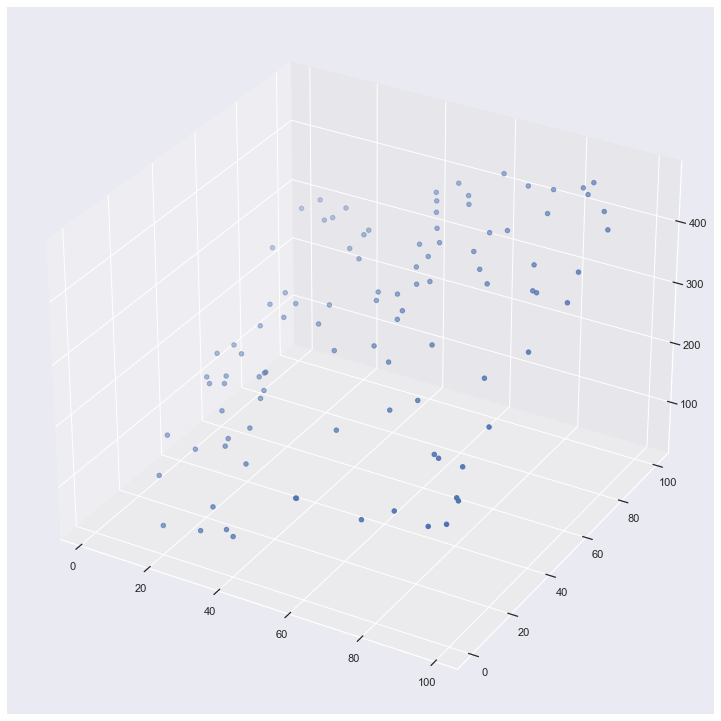

In [15]:
fig = plt.figure(figsize = (13, 13))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X[:, 0], X[:, 1], y);

In [16]:
model.w, model.R2

(array([2.01666793, 2.96985048, 1.46191241]), 0.9980040612475778)

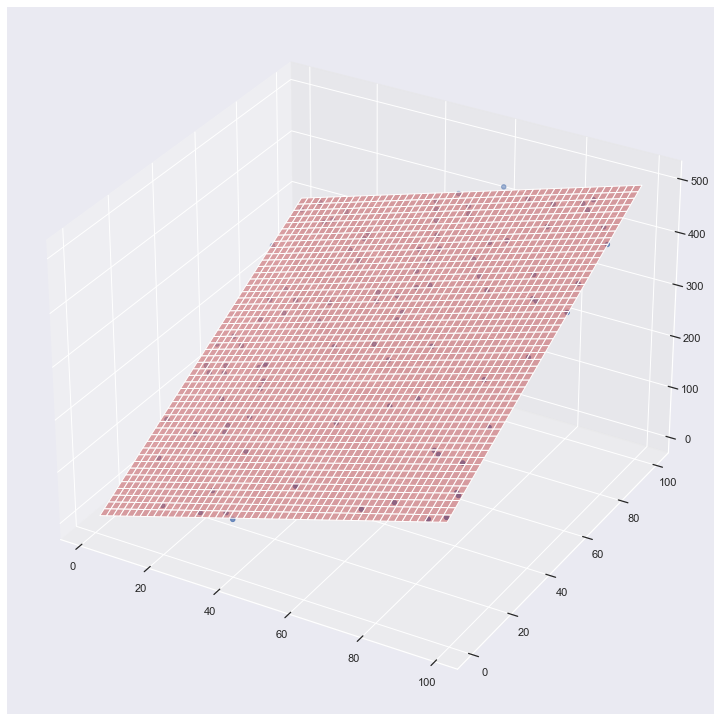

In [17]:
fig = plt.figure(figsize = (13, 13))
ax = fig.add_subplot(111, projection = '3d')



X1, X2 = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max()), np.linspace(X[:, 1].min(), X[:, 1].max()))

Z = 2.01666793 * X1 + 2.96985048 * X2 + 1.46191241

ax.plot_surface(X1, X2, Z, color = 'r', alpha = 0.5)

ax.scatter(X[:, 0], X[:, 1], y);

In [18]:
model.R2

0.9980040612475778

## Polynomial Regression

We had already made transformations on the data in such a way that we were able to model phenomena that did not seem to have a linear relationship

- In the linear regression model, what gives it its name is not the linearity of the input variables, but rather the linearity of the model parameters.


Now that we know the multiple regression we can complete polynomials that weren't possible before like the following:

$$\hat{y} = w_0 + w_1 x + w_2 x^2$$

In [19]:
data = pd.read_csv('data_poly.csv', names = ['X', 'y'])

In [20]:
data.head()

,X,y
0,76.700709,663.797276
1,95.273544,1014.362282
2,73.095723,618.938827
3,46.951635,288.012877
4,33.313748,144.977556


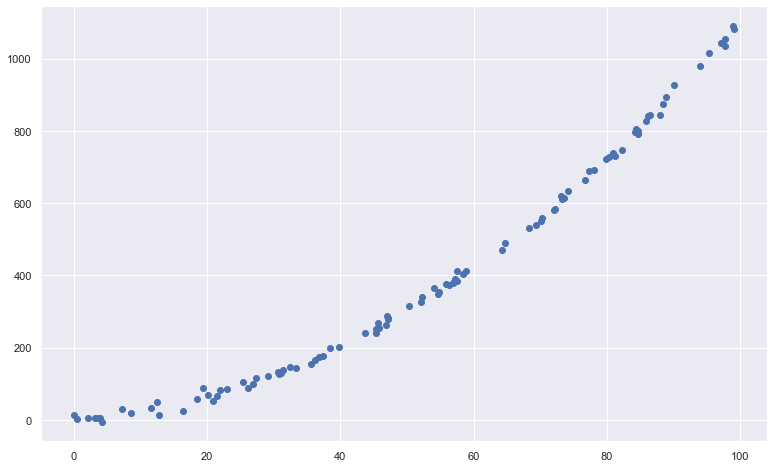

In [21]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(data['X'], data['y']);

In [22]:
data['X2'] = data['X'] ** 2

In [23]:
data.head()

,X,y,X2
0,76.700709,663.797276,5882.998700
1,95.273544,1014.362282,9077.048216
2,73.095723,618.938827,5342.984757
3,46.951635,288.012877,2204.456072
4,33.313748,144.977556,1109.805806


In [24]:
X = data[['X', 'X2']]
y = data['y']

In [25]:
model = LinearRegression(X, y)

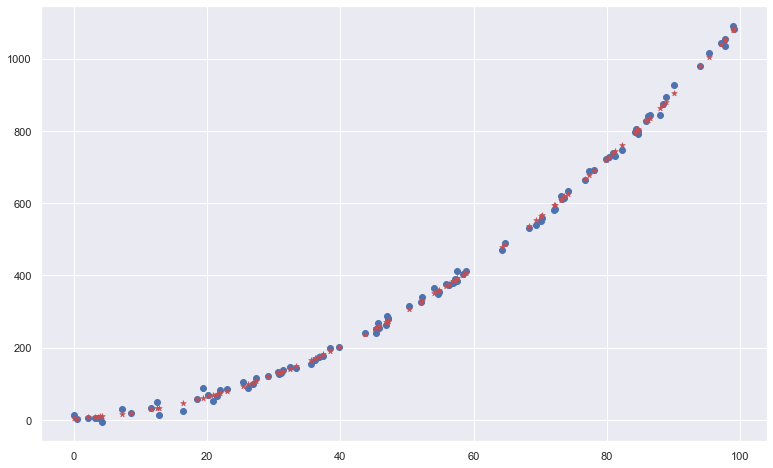

In [26]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(data['X'], data['y'])
ax.scatter(data['X'], model.predict(X), color = 'r', marker = '*', linewidths = 0.5);

In [27]:
data['X'].sort_values()

36     0.049932
12     0.477749
80     2.056169
96     3.139878
73     3.617612
        ...    
81    97.124709
8     97.679306
11    97.770938
91    98.964641
24    99.038561
Name: X, Length: 100, dtype: float64

In [28]:
X.sort_values('X')

,X,X2
36,0.049932,0.002493
12,0.477749,0.228244
80,2.056169,4.227829
96,3.139878,9.858834
73,3.617612,13.087116
...,...,...
81,97.124709,9433.209123
8,97.679306,9541.246792
11,97.770938,9559.156320
91,98.964641,9794.000071



This can provide an alternative solution to the problem of cars that we have seen before.

In [29]:
data_auto = pd.read_csv("auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [30]:
data_auto.dropna(inplace = True)

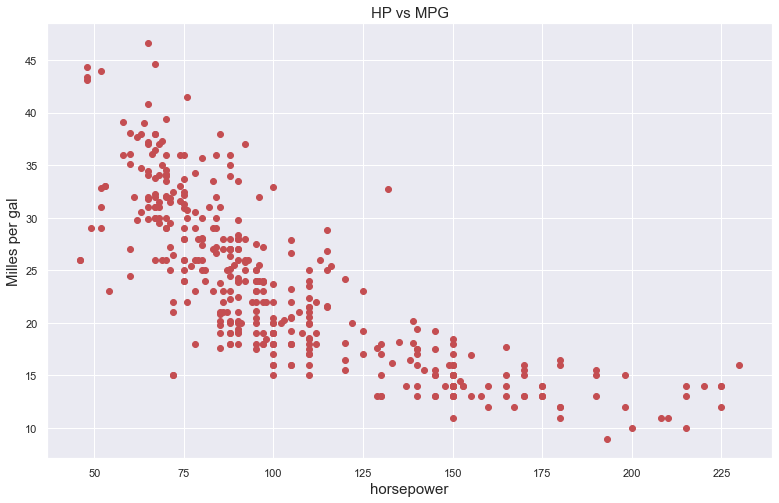

In [31]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
ax.set_xlabel("horsepower", fontsize = 15)
ax.set_ylabel("Milles per gal", fontsize = 15)
ax.set_title("HP vs MPG", fontsize = 15);

$$\hat{y} = w_0 + w_1 x^2$$

In [32]:
X = data_auto['horsepower'].values.reshape(data_auto.shape[0], 1)
y = data_auto['mpg']

In [33]:
model = LinearRegression(X ** 2, y)

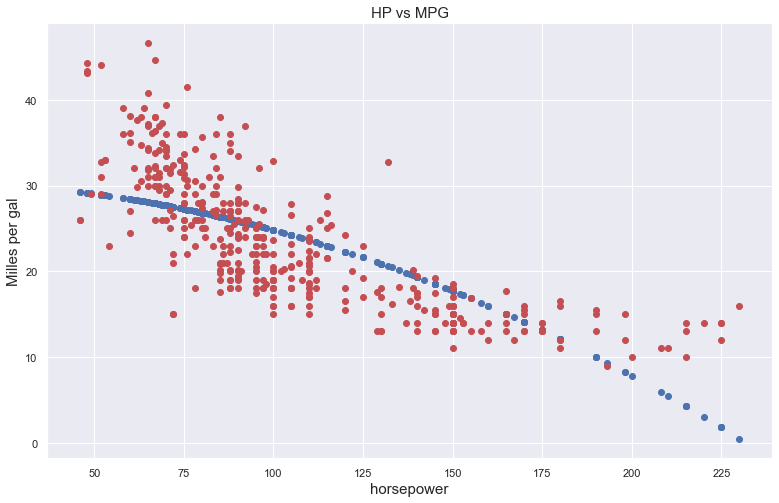

In [34]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.plot(X, y, "ro")
ax.scatter(X, model.predict(X ** 2))
ax.set_xlabel("horsepower", fontsize = 15)
ax.set_ylabel("Milles per gal", fontsize = 15)
ax.set_title("HP vs MPG", fontsize = 15);

In [35]:
model.R2

0.5073670089832611

$$\hat{y} = w_0 + w_1 x + w_2 x^2$$

In [36]:
data_auto['h2'] = X ** 2

In [37]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,h2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0


In [38]:
X = data_auto[['horsepower', 'h2']]

In [39]:
model = LinearRegression(X, y)

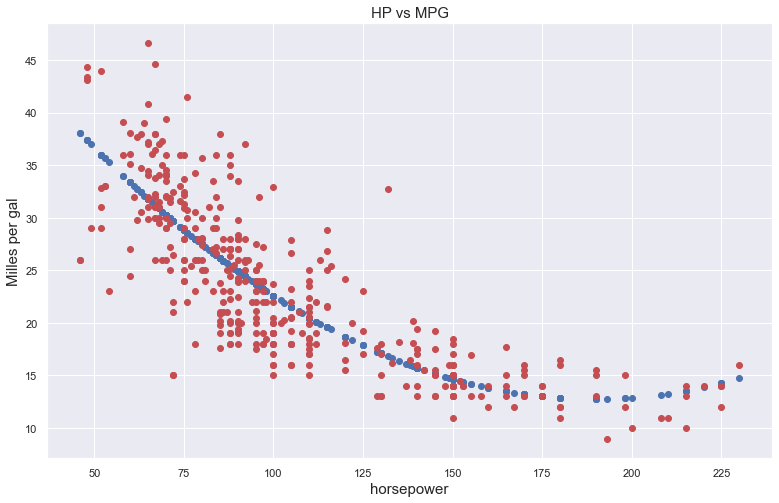

In [40]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.plot(data_auto['horsepower'], y, "ro")
ax.scatter(data_auto['horsepower'], model.predict(X))
ax.set_xlabel("horsepower", fontsize = 15)
ax.set_ylabel("Milles per gal", fontsize = 15)
ax.set_title("HP vs MPG", fontsize = 15);

In [41]:
model.R2

0.6875590305127516

$$y = \frac{1}{x}$$

In [58]:
x = np.linspace(1, 30, 100)
y = 1 / x

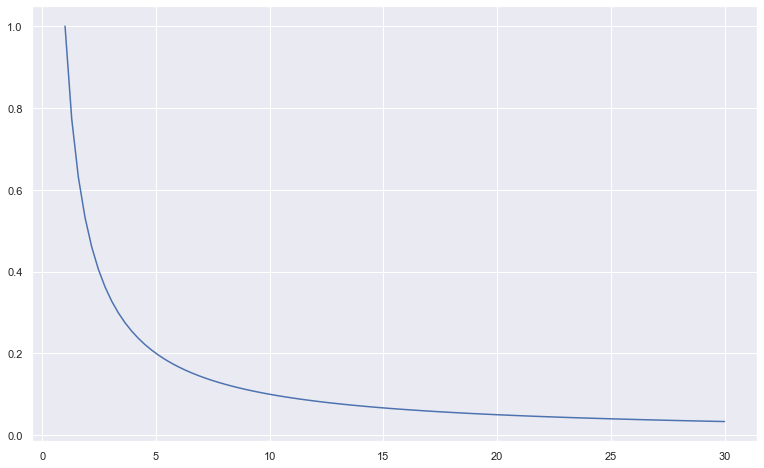

In [59]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(x, y)

In [60]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,h2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0


In [61]:
data_auto['1/h'] = 1 / data_auto['horsepower']

In [62]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,h2,1/h
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0,0.007692
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0,0.006061
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0,0.006667
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0,0.006667
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0,0.007143


In [67]:
X = data_auto[['1/h']]

In [68]:
y = data_auto['mpg']

In [69]:
model = LinearRegression(X, y)

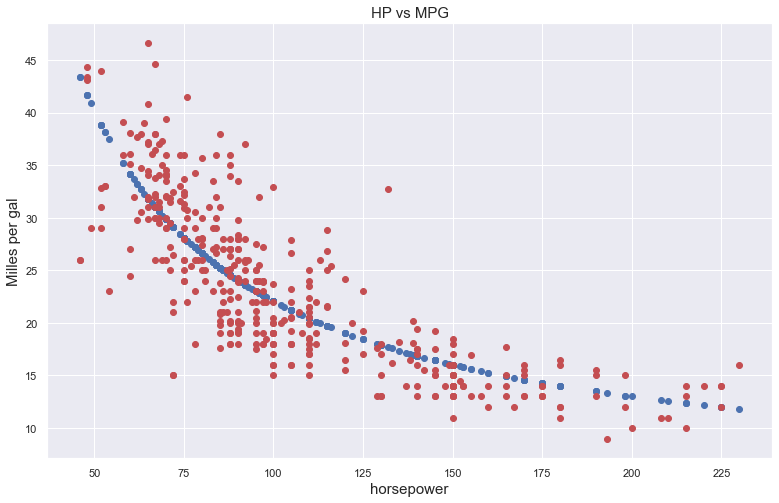

In [70]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.plot(data_auto['horsepower'], y, "ro")
ax.scatter(data_auto['horsepower'], model.predict(X))
ax.set_xlabel("horsepower", fontsize = 15)
ax.set_ylabel("Milles per gal", fontsize = 15)
ax.set_title("HP vs MPG", fontsize = 15);

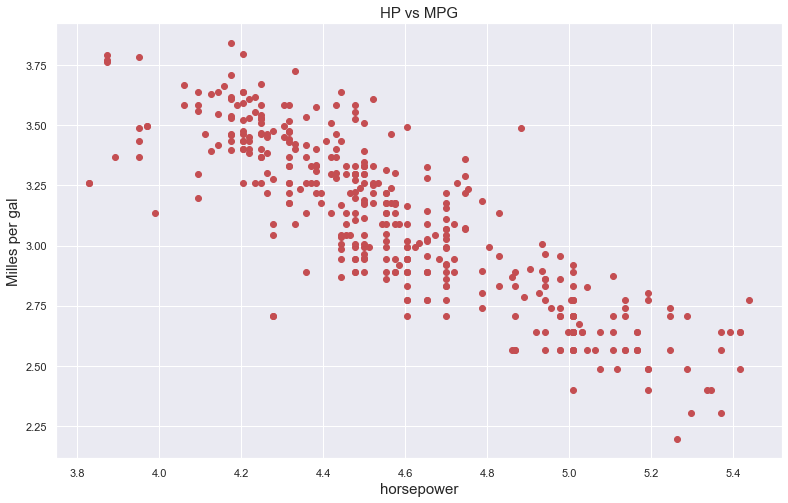

In [81]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.plot(np.log(data_auto['horsepower']), np.log(y), "ro")
ax.set_xlabel("horsepower", fontsize = 15)
ax.set_ylabel("Milles per gal", fontsize = 15)
ax.set_title("HP vs MPG", fontsize = 15);

In [83]:
model = LinearRegression(np.log(data_auto[['horsepower']]), np.log(y))

In [84]:
model.w

array([-0.84184699,  6.96064917])

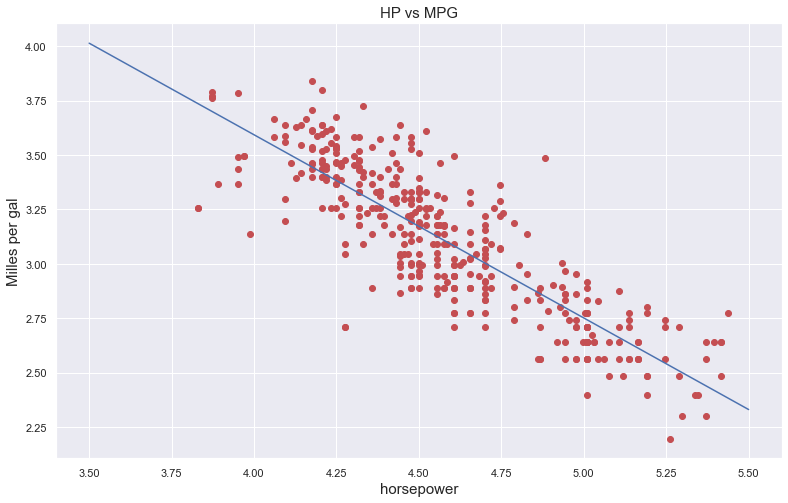

In [85]:
fig, ax = plt.subplots(figsize = (13, 8))

x = np.linspace(3.5, 5.5)
y2 = -0.84184699 * x + 6.96064917


ax.plot(np.log(data_auto['horsepower']), np.log(y), "ro")
ax.plot(x, y2)
ax.set_xlabel("horsepower", fontsize = 15)
ax.set_ylabel("Milles per gal", fontsize = 15)
ax.set_title("HP vs MPG", fontsize = 15);

In [88]:
model.R2

0.722696751235987

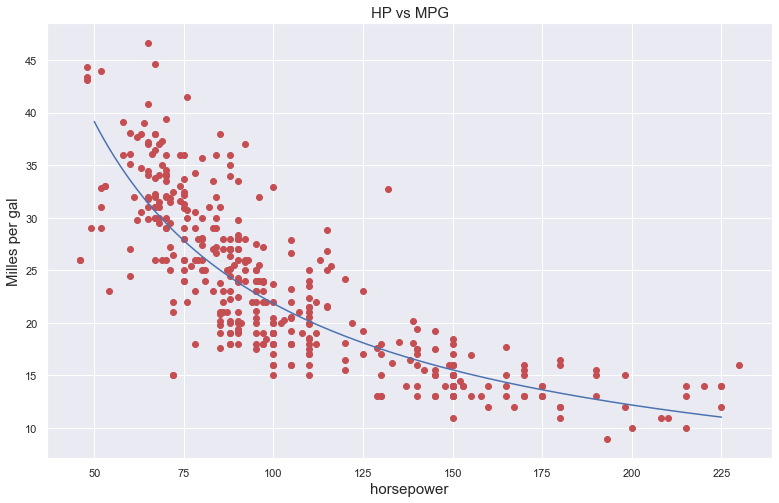

In [87]:
fig, ax = plt.subplots(figsize = (13, 8))

x = np.linspace(50, 225, 1000)
y2 = np.exp(6.96064917) * x ** -0.84184699


ax.plot(data_auto['horsepower'], y, "ro")
ax.plot(x, y2)
ax.set_xlabel("horsepower", fontsize = 15)
ax.set_ylabel("Milles per gal", fontsize = 15)
ax.set_title("HP vs MPG", fontsize = 15);

## When to stop? (overfiting)

if we already add $x^2$, we can add $x^3$, and $x^4$, and $x^5$ ... and keep increasing the precision of the model.

- After all we will only be making a Taylor approximation to any function.



But that's not always the best idea. If we do this our model can be too fit to the training data which will worsen its performance with the data that it has not seen before.

In [42]:
x = np.linspace(0, 4, 15)

In [43]:
y = x ** 2 + 2 * np.sin(5 * x)

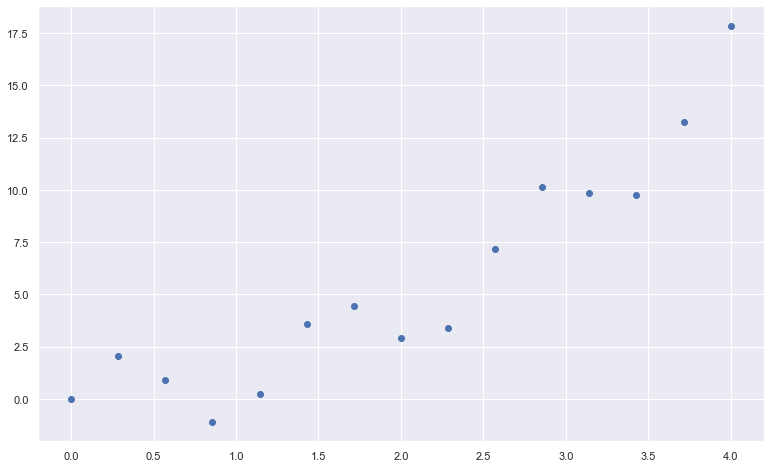

In [44]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(x, y);

Let's imagine that this is our data, let's make two models, one of degree 2 and the other of degree 10

In [45]:
x.reshape((15, 1))

array([[0.        ],
       [0.28571429],
       [0.57142857],
       [0.85714286],
       [1.14285714],
       [1.42857143],
       [1.71428571],
       [2.        ],
       [2.28571429],
       [2.57142857],
       [2.85714286],
       [3.14285714],
       [3.42857143],
       [3.71428571],
       [4.        ]])

In [46]:
X1 = np.append(x.reshape((15, 1)), x.reshape((15, 1)) ** 2, axis = 1)

In [47]:
X1

array([[ 0.        ,  0.        ],
       [ 0.28571429,  0.08163265],
       [ 0.57142857,  0.32653061],
       [ 0.85714286,  0.73469388],
       [ 1.14285714,  1.30612245],
       [ 1.42857143,  2.04081633],
       [ 1.71428571,  2.93877551],
       [ 2.        ,  4.        ],
       [ 2.28571429,  5.2244898 ],
       [ 2.57142857,  6.6122449 ],
       [ 2.85714286,  8.16326531],
       [ 3.14285714,  9.87755102],
       [ 3.42857143, 11.75510204],
       [ 3.71428571, 13.79591837],
       [ 4.        , 16.        ]])

In [48]:
X2 = np.append(x.reshape((15, 1)), x.reshape((15, 1)) ** 2, axis = 1)
for i in range(3, 11):
    X2 = np.append(X2, x.reshape((15, 1)) ** i, axis = 1)

In [49]:
X2.shape

(15, 10)

In [50]:
model1 = LinearRegression(X1, y)

In [51]:
model2 = LinearRegression(X2, y)

In [52]:
model1.R2, model2.R2

(0.933021679358262, 0.9984779600504621)

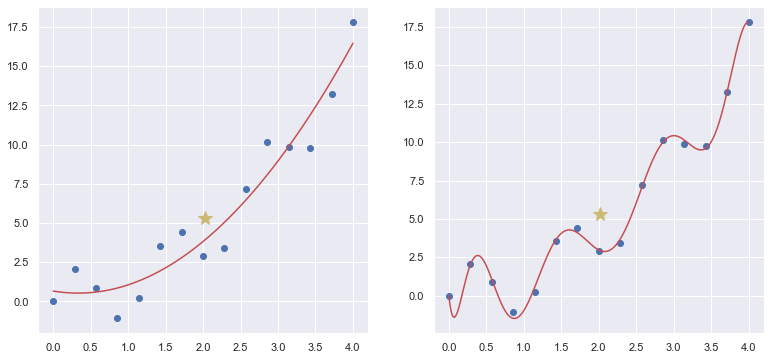

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (13, 6))

x_model = np.linspace(0, 4, 1000)

x1 = np.append(x_model.reshape((1000, 1)), x_model.reshape((1000, 1)) ** 2, axis = 1)

x2 = np.append(x_model.reshape((1000, 1)), x_model.reshape((1000, 1)) ** 2, axis = 1)
for i in range(3, 11):
    x2 = np.append(x2, x_model.reshape((1000, 1)) ** i, axis = 1)

ax[0].scatter(x, y)
ax[0].plot(x_model, model1.predict(x1), color = 'r')
ax[0].plot([2.02], [5.3], marker = '*', color = 'y', markersize = 15)

ax[1].scatter(x, y)
ax[1].plot(x_model, model2.predict(x2), color = 'r')
ax[1].plot([2.02], [5.3], marker = '*', color = 'y', markersize = 15);